In [1]:
# @title
from IPython.display import display, HTML

display(HTML('''
<div style="text-align: center;">
    <img src="https://static.vecteezy.com/system/resources/previews/008/652/584/original/breast-cancer-awareness-month-background-cartoon-illustration-with-ribbon-pink-and-woman-for-disease-prevention-campaign-or-healthcare-vector.jpg" width="650">
</div>
'''))

#**🩺Breast Cancer Classification**

###1️⃣ Load Libraries & Dataset 📂

In [2]:
 #! pip install ydata-profiling

In [3]:
#from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/content/data(1).csv')
#profile=ProfileReport(df,title='Profiling Report')
#profile.to_file(output_file='output.html')
#profile

###2️⃣ Explore the Data 🔍

In [4]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# Check Null values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [7]:
df.drop(df[['Unnamed: 32','id']],axis=1,inplace=True)

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
df.shape

(569, 31)

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


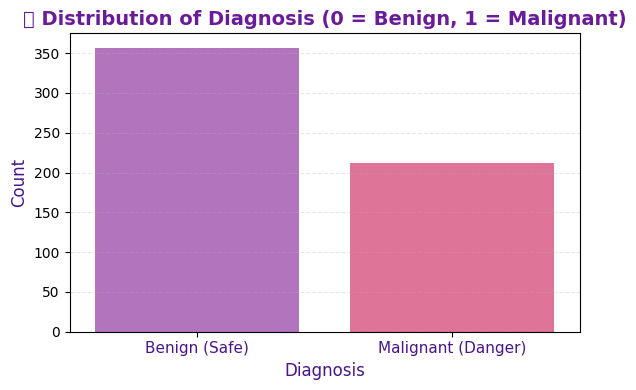

In [37]:
# 💗 1️⃣ Distribution of Classes (Benign vs Malignant)
plt.figure(figsize=(6,4))
sns.countplot(
    x='diagnosis',
    data=df,
    palette=['#ba68c8', '#f06292']  # موف ووردي ناعم بدلاً من الأخضر والأحمر
)

plt.title('💗 Distribution of Diagnosis (0 = Benign, 1 = Malignant)', fontsize=14, color='#6a1b9a', fontweight='bold')
plt.xlabel('Diagnosis', fontsize=12, color='#4a148c')
plt.ylabel('Count', fontsize=12, color='#4a148c')
plt.xticks(
    ticks=[0,1],
    labels=['Benign (Safe)', 'Malignant (Danger)'],
    color='#4a148c',
    fontsize=11
)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


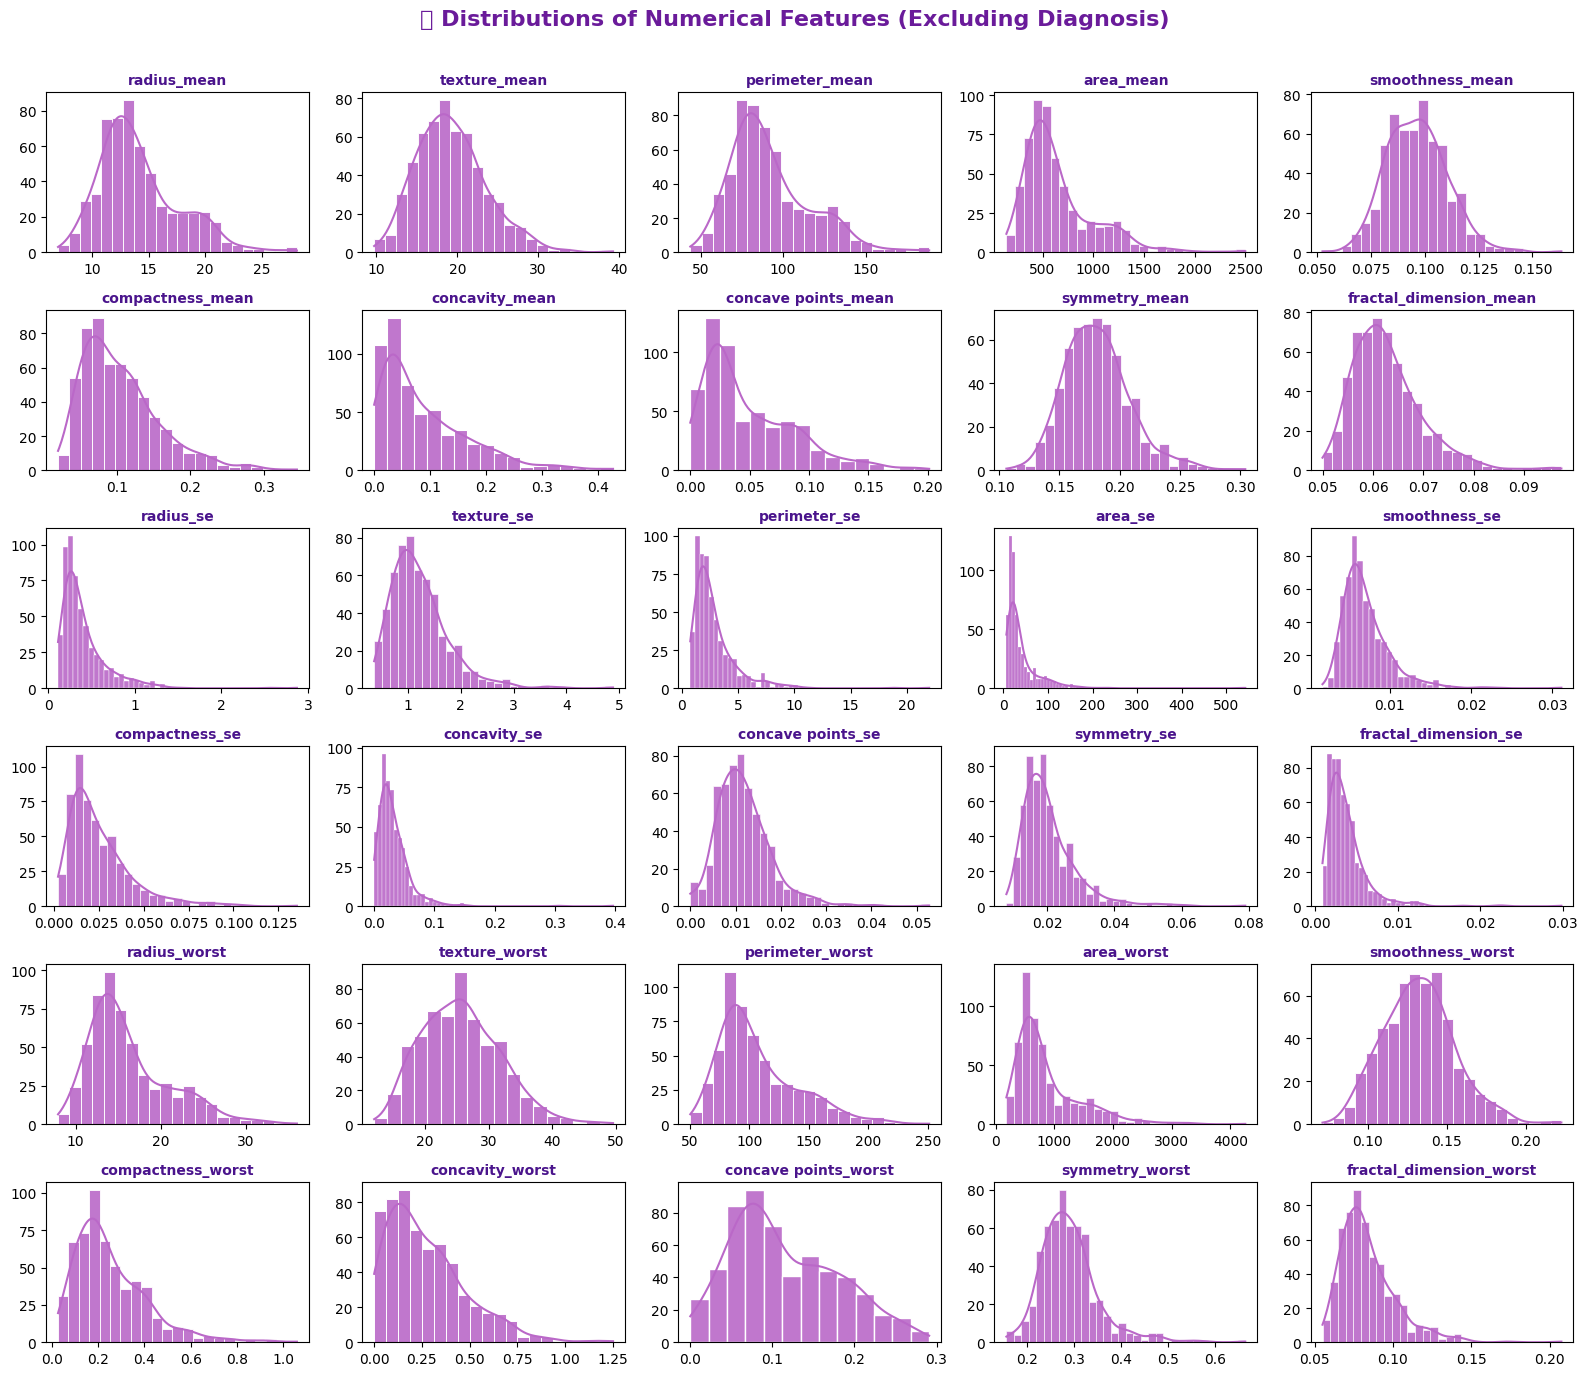

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 اختيار الأعمدة الرقمية فقط (بدون diagnosis)
num_df = df.select_dtypes(include=['number']).drop(columns=['diagnosis'], errors='ignore')

# 🎨 إعداد الشكل العام
plt.figure(figsize=(16, 14))
plt.suptitle('💗 Distributions of Numerical Features (Excluding Diagnosis)', fontsize=16, color='#6a1b9a', fontweight='bold')

# 🔹 رسم كل feature في subplot منفصل
for i, column in enumerate(num_df.columns, 1):
    plt.subplot(6, 5, i)  # 6 صفوف × 5 أعمدة (حوالي 30 خاصية)
    sns.histplot(
        num_df[column],
        kde=True,
        color='#ba68c8',          # 🎨 لون موف وردي ناعم
        edgecolor='white',
        alpha=0.9
    )
    plt.title(column, fontsize=10, color='#4a148c', fontweight='semibold')
    plt.xlabel('')
    plt.ylabel('')

# ضبط التباعد بين الرسومات
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [15]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

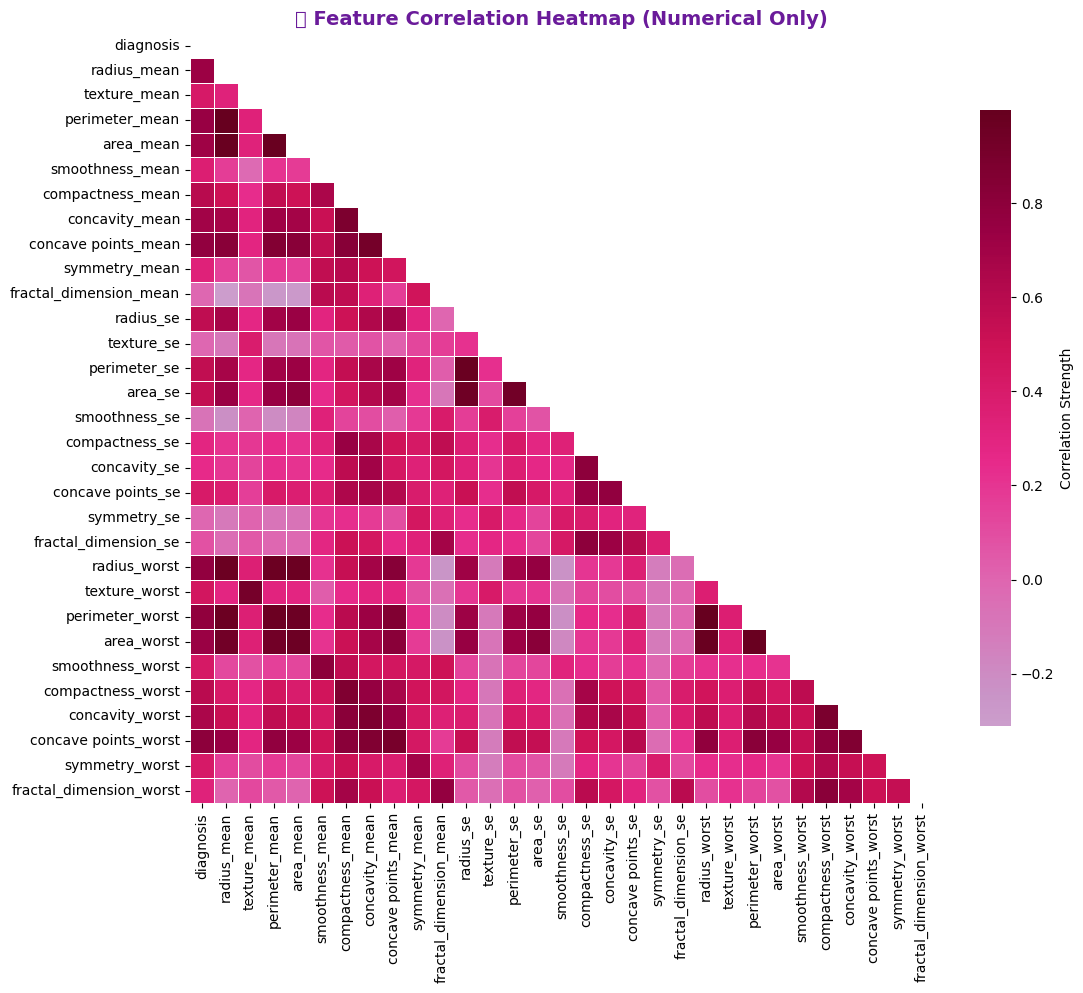

In [35]:
# 💞 Feature Correlation Heatmap (Improved Style)

# تحديد الأعمدة الرقمية فقط
num_df = df.select_dtypes(include=[np.number])

# حساب مصفوفة الارتباط
corr = num_df.corr()

# إخفاء النصف العلوي لتوضيح الشكل
mask = np.triu(np.ones_like(corr, dtype=bool))

# 🎨 رسم الخريطة
plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='PuRd',           # 🎨 تدرج موف وردي ناعم
    center=0,
    annot=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Strength"}
)

plt.title('💗 Feature Correlation Heatmap (Numerical Only)', fontsize=14, fontweight='bold', color='#6a1b9a')
plt.xlabel('')
plt.ylabel('')
plt.show()


###3️⃣ Data Preparation ⚙️

In [17]:
# split train test
from sklearn.model_selection import train_test_split

X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4️⃣ Feature Selection - Remove Highly Correlated Features 📉

In [18]:
# نحسب مصفوفة الارتباط على train فقط
corr_matrix = X_train.corr().abs()

# نعمل mask علشان مانكرر القيم
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# نختار الأعمدة اللي فيها ارتباط عالي (مثلاً > 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("الأعمدة اللي ممكن نحذفها:\n", to_drop)

الأعمدة اللي ممكن نحذفها:
 ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [19]:
# نحذفها من train و test
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

In [20]:
X_train.shape, X_test.shape


((455, 20), (114, 20))

### 5️⃣ Data Scaling ⚖️

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 6️⃣ Feature Selection - SelectKBest 🔑

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'radius_se', 'concave points_se', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


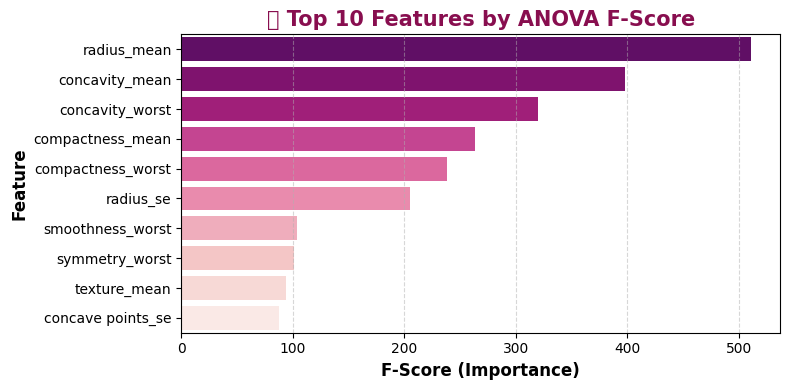

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate feature scores and create DataFrame
feature_scores = pd.DataFrame({
    'Feature': X_train.columns[selector.get_support()],
    'Score': selector.scores_[selector.get_support()]
}).sort_values(by='Score', ascending=False)

# 🎯 عرض أفضل الخصائص مع شكل بصري متناسق (عكس التدرج اللوني)
plt.figure(figsize=(8,4))

sns.barplot(
    x='Score',
    y='Feature',
    data=feature_scores.head(10),
    palette='RdPu_r'  # 🔁 مقلوب التدرج اللوني (r = reversed)
)

plt.title('💫 Top 10 Features by ANOVA F-Score', fontsize=15, fontweight='bold', color='#880e4f')
plt.xlabel('F-Score (Importance)', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 7️⃣ Logistic Regression with GridSearchCV 🧠

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize LogisticRegression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("🏆 Best Score:", grid_search.best_score_)

✅ Best Parameters: {'C': 1000, 'penalty': 'l2'}
🏆 Best Score: 0.9670329670329672


### 8️⃣ Model Evaluation 📊

In [26]:
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', C=1000, penalty='l2')
log_reg.fit(X_train_selected, y_train)


LogisticRegression(C=1000, max_iter=1000, random_state=42, solver='liblinear')

In [27]:
log_reg.score(X_train_selected, y_train)

0.9824175824175824

In [28]:
log_reg.score(X_test_selected, y_test)

0.9649122807017544

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_reg.predict(X_test_selected)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[70  2]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



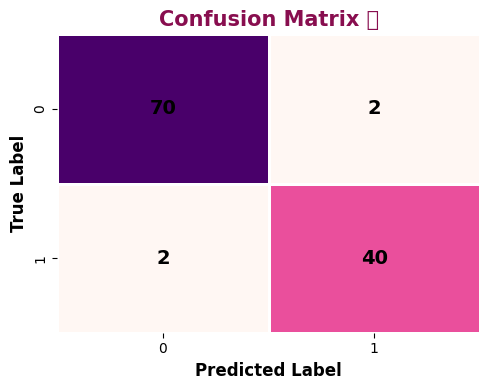

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Confusion Matrix بألوان أفتح وأرقام أوضح
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap="RdPu",          # وردي فاتح وواضح أكثر
            linewidths=1,
            linecolor='white',
            cbar=False,
            annot_kws={"size": 14, "weight": "bold", "color": "black"})  # الأرقام بالأسود

plt.title("Confusion Matrix 💗", fontsize=15, fontweight='bold', color='#880e4f')
plt.xlabel("Predicted Label", fontsize=12, fontweight='bold')
plt.ylabel("True Label", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


### 9️⃣ ROC Curve & Best Threshold 🎯

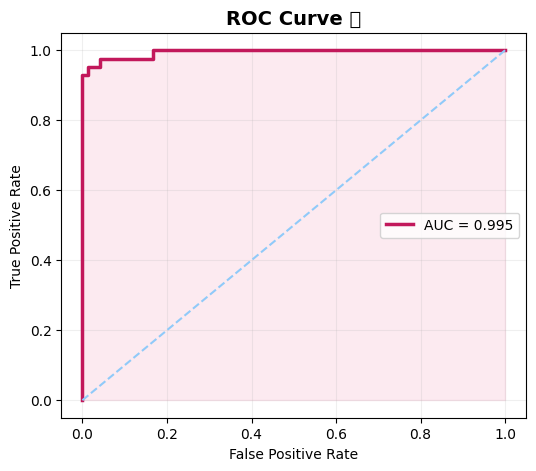

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# 🎯 التنبؤ بالاحتمالات
y_prob = log_reg.predict_proba(X_test_selected)[:, 1]

# حساب وعرض ROC و AUC
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="#c2185b", linewidth=2.5, label=f"AUC = {auc:.3f}")  # وردي غامق
plt.plot([0,1], [0,1], linestyle='--', color='#90caf9')  # أزرق فاتح مرجعي
plt.fill_between(fpr, tpr, color='#f8bbd0', alpha=0.3)   # ظل وردي ناعم

plt.title("ROC Curve 💖", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.2)
plt.show()


In [32]:
# @title
from IPython.display import display, HTML

display(HTML('''
<div style="text-align: center;">
    <img src="https://png.pngtree.com/png-clipart/20221217/original/pngtree-breast-cancer-awareness-concept-design-png-image_8760078.png" width="500">
</div>
'''))